In [1]:
# !pip install tensorflow-datasets

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [3]:
data=tfds.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteAUP6RN/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteAUP6RN/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
data.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [5]:
data.as_numpy_iterator().next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

In [6]:
data.as_numpy_iterator().next()['label']

2

In [7]:
datait=data.as_numpy_iterator()

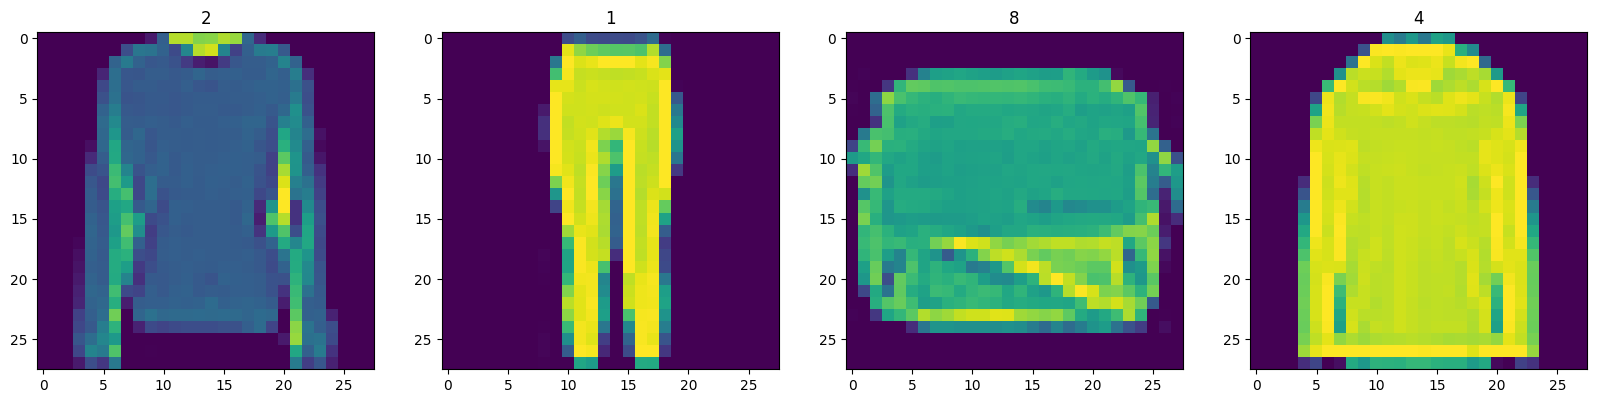

In [8]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for ind in range(4):
  sample=datait.next()
  ax[ind].imshow(sample['image'])
  ax[ind].title.set_text(sample['label'])

In [9]:
def scale_image(data):
  data=data['image']
  return data/255

In [10]:
df=tfds.load('fashion_mnist',split='train')
df=df.map(scale_image)
df=df.cache()
df=df.shuffle(60000)
df=df.batch(128)
df=df.prefetch(64)


In [11]:
df.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D

## BUILD THE GENERATOR

In [13]:
def build_generator():
  model=Sequential()
  model.add(Dense(7*7*128,input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(1,4,padding='same',activation='sigmoid'))

  return model

In [14]:
test_model=build_generator()

In [15]:
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [16]:
import numpy as np
img=test_model.predict(np.random.randn(4,128,1))

1/1 [==============================] - 7s 7s/step


In [17]:
ele=np.random.rand(4,128,1)
ele

array([[[0.66727451],
        [0.7627134 ],
        [0.92308108],
        [0.10425737],
        [0.74338853],
        [0.32859542],
        [0.87004058],
        [0.25123255],
        [0.08773426],
        [0.72288686],
        [0.35502213],
        [0.03075204],
        [0.21609183],
        [0.53415827],
        [0.45289808],
        [0.82661421],
        [0.5383489 ],
        [0.88949539],
        [0.14171992],
        [0.06087261],
        [0.42541282],
        [0.94650195],
        [0.53609838],
        [0.91977027],
        [0.32443943],
        [0.33769841],
        [0.45213962],
        [0.05670376],
        [0.82813141],
        [0.02948262],
        [0.09319047],
        [0.94670626],
        [0.14248936],
        [0.73279272],
        [0.08152431],
        [0.53988524],
        [0.7908988 ],
        [0.40257773],
        [0.25286685],
        [0.29211768],
        [0.13460785],
        [0.5109967 ],
        [0.74898035],
        [0.25422884],
        [0.90769854],
        [0

In [18]:
img

array([[[[0.50514466],
         [0.509601  ],
         [0.5155258 ],
         ...,
         [0.50979334],
         [0.50652254],
         [0.50356907]],

        [[0.49338773],
         [0.506687  ],
         [0.5163811 ],
         ...,
         [0.5116619 ],
         [0.5084944 ],
         [0.5050195 ]],

        [[0.49231857],
         [0.50191087],
         [0.5110056 ],
         ...,
         [0.5129344 ],
         [0.5089819 ],
         [0.50498235]],

        ...,

        [[0.5049637 ],
         [0.51368076],
         [0.51376957],
         ...,
         [0.50395834],
         [0.49972895],
         [0.50268793]],

        [[0.501692  ],
         [0.5071371 ],
         [0.5087768 ],
         ...,
         [0.5070038 ],
         [0.50333226],
         [0.5023589 ]],

        [[0.5031255 ],
         [0.5049135 ],
         [0.5063451 ],
         ...,
         [0.50050074],
         [0.5016125 ],
         [0.50295985]]],


       [[[0.5058898 ],
         [0.5054863 ],
         [0.50

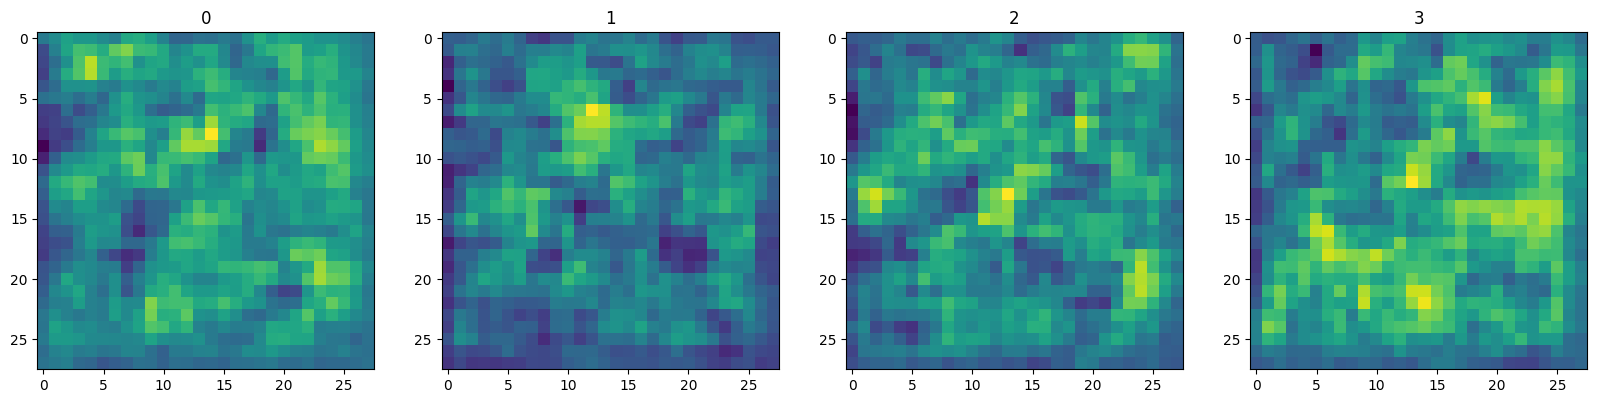

In [19]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for ind,i in enumerate(img):
  ax[ind].imshow(i)
  ax[ind].title.set_text(ind)

## Build the discriminator

In [20]:
def build_des():
  model=Sequential()
  #first conv block
  model.add(Conv2D(32,5,input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #flatten and then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  return model

In [21]:
dec=build_des()

In [22]:
dec.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [23]:
img.shape

(4, 28, 28, 1)

In [24]:
dec.predict(img)

1/1 [==============================] - 0s 206ms/step


array([[0.5025264 ],
       [0.5025572 ],
       [0.5023682 ],
       [0.50245523]], dtype=float32)

In [25]:
# for single image
dec.predict(np.expand_dims(img[0],0))

1/1 [==============================] - 0s 142ms/step


array([[0.5025264]], dtype=float32)

## Construct traning loop


In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [27]:
g_opt=Adam(learning_rate=0.0001)
d_opt=Adam(learning_rate=0.00001)

In [28]:
g_loss=BinaryCrossentropy()
d_loss=BinaryCrossentropy()

In [29]:
from tensorflow.keras.models import Model


In [31]:
class FashionGAN(Model):
  def __init__(self,generator,descriminator,*args,**kwargs):
    super().__init__(*args,**kwargs)
    #Create attribute for gen and disc
    self.generator=generator
    self.descriminator=descriminator

  def  compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    super().compile(*args,**kwargs)
    self.g_opt=g_opt
    self.d_opt=d_opt

    self.g_loss=g_loss
    self.d_loss=d_loss

  def train_step(self,batch):
    real_image=batch
    fake_image=self.generator(tf.random.normal((128,128,1)),training=False)

    # train the discriminator
    # Calculate the gradiant
    with tf.GradientTape() as d_tape:
      # 1> Pass the real and fack image to the disccriminator
      y_hat_real=self.descriminator(real_image,training=True)
      y_hat_fake=self.descriminator(fake_image,training=True)
      y_hat_realfake=tf.concat([y_hat_real,y_hat_fake],axis=0)
      # 2>Create the labels for real->0 and fack images->1
      y_realfake=tf.concat([tf.zeros_like(y_hat_real),tf.ones_like(y_hat_fake)],axis=0)

      # 3> Add some noise to the TRUE output
      noice_real=0.15*tf.random.uniform(tf.shape(y_hat_real))
      noice_fake=-0.15*tf.random.uniform(tf.shape(y_hat_fake))
      y_realfake+=tf.concat([noice_real,noice_fake],axis=0)
      # 4> Calculate loss
      total_d_loss=self.d_loss(y_realfake,y_hat_realfake)
    # 5> Apply backpropagation by calculating gradiant and using optimizer
    dgrad=d_tape.gradient(total_d_loss,self.descriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad,self.descriminator.trainable_variables))


    # TRAIN THE GENERATOR
    with tf.GradientTape() as g_tape:
      # Generate some new images
      gen_image=self.generator(tf.random.normal((128,128,1)),training=True)
      #Create the predicted lablels
      predicted_labels=self.descriminator(gen_image,training=False)
      #calculate loss
      total_g_loss=self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)
    # apply backprop
    ggrad=g_tape.gradient(total_g_loss,self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))



    #return

    return {"d_loss":total_d_loss,"g_loss":total_g_loss}



In [32]:
generator=build_generator()
discriminator=build_des()

In [33]:
fashgan=FashionGAN(generator,discriminator)

In [34]:
# compile
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

### Build callback

In [36]:

import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [40]:
# class ModelMonitor(Callback):
#     def __init__(self, num_img=3, latent_dim=128):
#         self.num_img = num_img
#         self.latent_dim = latent_dim

#     def on_epoch_end(self, epoch, logs=None):
#         random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
#         generated_images = self.model.generator(random_latent_vectors)
#         generated_images *= 255
#         generated_images.numpy()
#         for i in range(self.num_img):
#             img = array_to_img(generated_images[i])
#             img.save(os.path.join('content','images', f'generated_img_{epoch}_{i}.png'))

In [42]:
hist = fashgan.fit(df, epochs=20)

Epoch 1/20
469/469 [==============================] - 76s 161ms/step - d_loss: 0.2993 - g_loss: 6.4717
Epoch 2/20
469/469 [==============================] - 75s 160ms/step - d_loss: 0.2805 - g_loss: 6.9168
Epoch 3/20
469/469 [==============================] - 75s 160ms/step - d_loss: 0.2771 - g_loss: 6.6658
Epoch 4/20
469/469 [==============================] - 75s 160ms/step - d_loss: 0.2755 - g_loss: 6.2871
Epoch 5/20
469/469 [==============================] - 75s 160ms/step - d_loss: 0.2732 - g_loss: 5.8937
Epoch 6/20
469/469 [==============================] - 75s 160ms/step - d_loss: 0.3126 - g_loss: 3.6122
Epoch 7/20
469/469 [==============================] - 75s 160ms/step - d_loss: 0.2727 - g_loss: 2.6440
Epoch 8/20
469/469 [==============================] - 75s 160ms/step - d_loss: 0.2714 - g_loss: 2.6505
Epoch 9/20
469/469 [==============================] - 75s 160ms/step - d_loss: 0.2702 - g_loss: 2.6672
Epoch 10/20
469/469 [==============================] - 75s 160ms/step - d

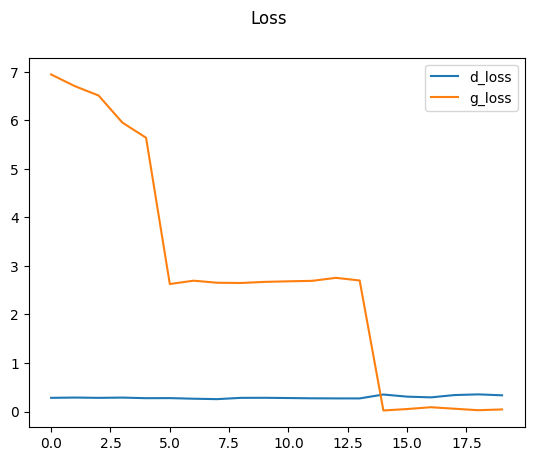

In [43]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

In [47]:
generator.save('generator.h5')


In [48]:
discriminator.save('discriminator.h5')

In [50]:
generator.load_weights("/content/generator.h5")

In [51]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

1/1 [==============================] - 0s 486ms/step


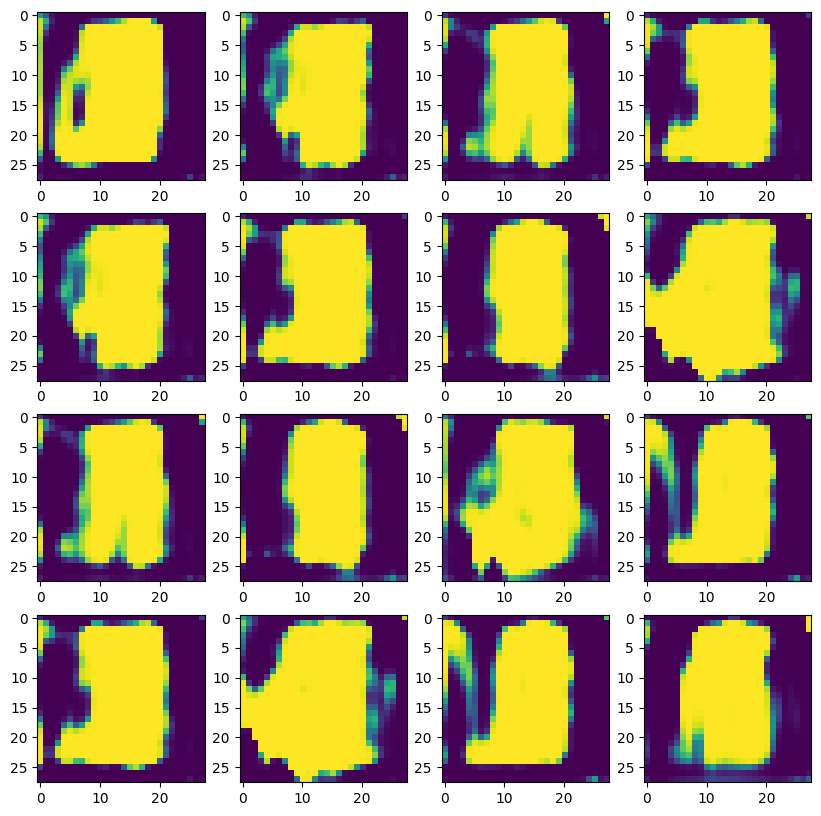

In [53]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])